# Title:
# Comparison of ML Classification Algorithm

# Classification Algorithm Comparison with Synthetic Data

This project aims to compare various classification algorithms on synthetic datasets to understand their strengths and weaknesses in different scenarios. I will evaluate the following classifiers:

- Naive Bayes Classification
- Logistic Regression
- Quadratic Discriminant Analysis (QDA)
- Support Vector Machine (SVM) with Radial Basis Function (RBF)
- Decision Tree
- K-Nearest Neighbors (KNN) with K=1

I will generate four synthetic datasets using combinations of `make_blobs`, `make_circles`, and `make_moons` from `sklearn.datasets`. My goal is to analyze the performance of each classifier based on accuracy, precision, recall, and F1-score, and to visualize their decision boundaries.

## Load Libraries

In [17]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap


## Synthetic Data Generation

To compare the classifiers effectively, I will generate four types of synthetic datasets with varying degrees of complexity and separation between classes. The synthetic datasets will be created using the following sklearn functions:

- `make_blobs`: For generating isotropic Gaussian blobs for clustering.
- `make_circles`: For generating a large circle containing a smaller circle in 2D.
- `make_moons`: For generating a two interleaving half circles.

The datasets will be designed to challenge the classifiers in different ways, allowing me to observe their performance under various conditions.


In [2]:
# Generate the make_blobs dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Print shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# print the first 10 labels to match the array output
print("First 10 labels:", y[:10])

Shape of X: (100, 2)
Shape of y: (100,)
First 10 labels: [2 1 0 1 2 1 0 1 1 0]


In [3]:
# Generate the make_circles dataset
X2, y2 = make_circles(n_samples=100, noise=0.05, random_state=42)

# Print shapes of X and y
print("Shape of X2:", X2.shape)
print("Shape of y2:", y2.shape)

#print the first 10 labels
print("First 10 labels:", y2[:10])


Shape of X2: (100, 2)
Shape of y2: (100,)
First 10 labels: [1 1 1 0 0 0 0 1 0 0]


In [4]:
# Generate make_moons dataset
X3, y3 = make_moons(n_samples=100, noise=0.1, random_state=42)

# Print shapes of X and y
print("Shape of X3:", X3.shape)
print("Shape of y3:", y3.shape)

# print the first 10 labels
print("First 10 labels:", y3[:10])


Shape of X3: (100, 2)
Shape of y3: (100,)
First 10 labels: [1 1 1 0 0 0 0 1 0 0]


## Data Visualization

Before proceeding with the classification, it's crucial to visualize the datasets. This step will help to understand the distribution and separation of classes, guiding our expectations on the performance of each classifier.


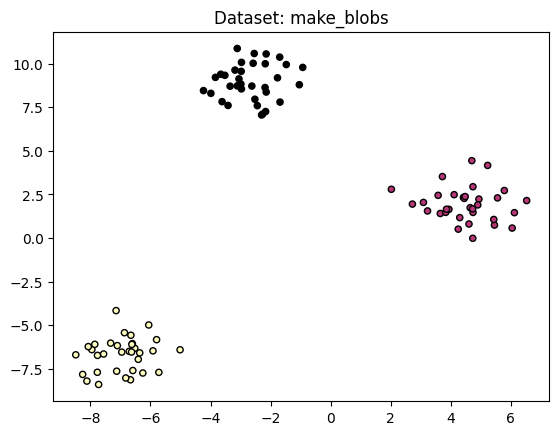

In [5]:

# Visualize the dataset of make_blobs
plt.scatter(X[:, 0], X[:, 1], c=y, cmap= 'magma', edgecolor='k', s=20)
plt.title("Dataset: make_blobs")
plt.show()

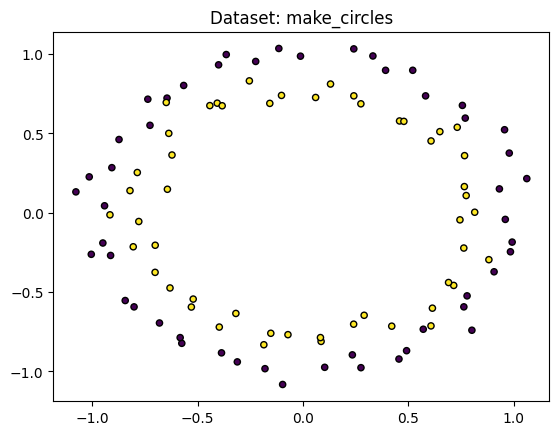

In [6]:
# Visualize the dataset make_circles
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='viridis', edgecolor='k', s=20)
plt.title("Dataset: make_circles")
plt.show()

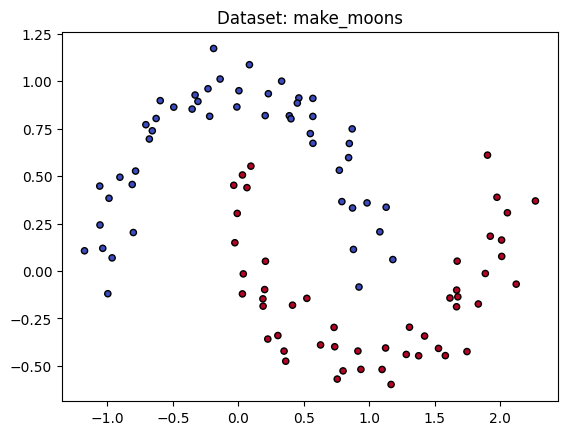

In [13]:
# Visualize the dataset of make-moons
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap= 'coolwarm', edgecolor='k', s=20)
plt.title("Dataset: make_moons")
plt.show()

## Spiliting the Data



For a fair evaluation of each classifier, each dataset will be split  into a training set and a testing set. The training set will be used to train the classifiers, while the testing set will help to evaluate their performance. This approach ensures that assessment reflects the classifiers' ability to generalize to unseen data.


In [8]:
#splitting the first dataset make-blobs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
#splitting the 2nd dataset make-circles
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


In [10]:
#splitting the 2nd dataset make-moon
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

#Classifier Definitions


Each classifier will be used with its default parameters, except where specific tuning is necessary.


In [11]:
# Define the classifiers
gnb = GaussianNB()
log_reg = LogisticRegression()
qda = QuadraticDiscriminantAnalysis()
svc = SVC(kernel='rbf')
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=1)

classifiers = [gnb, log_reg, qda, svc, decision_tree, knn]
classifier_names = ['Gaussian Naive Bayes', 'Logistic Regression', 'QDA', 'SVM with RBF', 'Decision Tree', 'KNN (k=1)']


#Training and Evaluation


Each classifier will be trained on the training set of each dataset and then evaluated on both the training set (to assess fit) and the testing set (to assess generalization). The `classification_report` from `sklearn.metrics` will be used to evaluate the classifiers' performance.


In [14]:
# Loop through each classifier for the make_blobs dataset
for clf, name in zip(classifiers, classifier_names):
    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict on the training data and the test data
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Print the classifier's name
    print(f"Classifier: {name}")

    # Evaluation on training data
    print("Training Classification Report:")
    print(classification_report(y_train, y_train_pred))

    # Evaluation on test data
    print("Test Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Print a separator
    print("-" * 80)

Classifier: Gaussian Naive Bayes
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        19

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------------------------------------
Classifier: Logistic Regression
Training Classification Report:


#Comparison of classifiers for make-blobs dataset
Based on the above classification reports, all classifiers—Gaussian Naive Bayes, Logistic Regression, Quadratic Discriminant Analysis (QDA), Support Vector Machine (SVM) with Radial Basis Function (RBF), Decision Tree, and K-Nearest Neighbors (KNN) with k=1—achieved perfect scores in both training and testing. This means that in terms of accuracy, precision, recall, and f1-score, each classifier performed equally well, achieving 100% on all metrics.

In [15]:
# Loop through each classifier for make_circles dataset
for clf, name in zip(classifiers, classifier_names):
    # Fit the classifier on the training data
    clf.fit(X2_train, y2_train)

    # Predict on the training data and test data
    y2_train_pred = clf.predict(X2_train)
    y2_test_pred = clf.predict(X2_test)

    # Print the classifier's name
    print(f"Classifier: {name}")

    # Evaluation on the training data
    print("Training Classification Report:")
    print(classification_report(y2_train, y2_train_pred))

    # Evaluation on test data
    print("Test Classification Report:")
    print(classification_report(y2_test, y2_test_pred))

    # Print a separator
    print("-" * 80)

Classifier: Gaussian Naive Bayes
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.13      0.24        30
           1       0.61      1.00      0.75        40

    accuracy                           0.63        70
   macro avg       0.80      0.57      0.50        70
weighted avg       0.77      0.63      0.53        70

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.26        20
           1       0.37      1.00      0.54        10

    accuracy                           0.43        30
   macro avg       0.69      0.57      0.40        30
weighted avg       0.79      0.43      0.35        30

--------------------------------------------------------------------------------
Classifier: Logistic Regression
Training Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

#Comparison of classifiers for make-circles dataset
The SVM with RBF and Decision Tree classifiers show the best generalization from training to testing data. The SVM with RBF has a good balance between precision and recall, and despite not having the highest accuracy on the test set (which is held by the Decision Tree), its performance is still robust with less indication of overfitting compared to the Decision Tree and KNN.
Decision Tree and KNN (k=1) demonstrate potential overfitting, as indicated by their perfect training scores but lower testing scores. Despite this, the Decision Tree's testing performance is quite high, making it a strong contender.

In [16]:
# Loop through each classifier for make_circles dataset
for clf, name in zip(classifiers, classifier_names):
    # Fit the classifier on the training data
    clf.fit(X3_train, y3_train)

    # Predict on the training data and test data
    y3_train_pred = clf.predict(X3_train)
    y3_test_pred = clf.predict(X3_test)

    # Print the classifier's name
    print(f"Classifier: {name}")

    # Evaluation on training data
    print("Training Classification Report:")
    print(classification_report(y3_train, y3_train_pred))

    # Evaluation on the test data
    print("Test Classification Report:")
    print(classification_report(y3_test, y3_test_pred))

    # Print a separator
    print("-" * 80)

Classifier: Gaussian Naive Bayes
Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.88      0.88      0.88        40

    accuracy                           0.86        70
   macro avg       0.85      0.85      0.85        70
weighted avg       0.86      0.86      0.86        70

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30

--------------------------------------------------------------------------------
Classifier: Logistic Regression
Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30

#Comparison of classifiers for make-moons dataset:
The SVM with RBF classifier emerges as the most effective for the make-moons dataset, showcasing excellent generalization with minimal performance drop from training to test sets. Its high accuracy and balanced precision-recall trade-off make it particularly suited for datasets with complex, non-linear class separations.KNN (k=1), while achieving perfect test scores, may not always be this reliable in more varied or noisy real-world scenarios, where its performance could be more variable. However, its results here underline the potential for highly accurate classifications in well-defined problem spaces.Decision Trees provide an interpretable model but with a slight compromise in generalization to unseen data compared to the SVM with RBF. Its performance, however, remains strong and highlights the utility of decision trees in scenarios where model interpretability is important alongside performance.Gaussian Naive Bayes, Logistic Regression, and QDA demonstrate good generalization but with varying effectiveness across different classes, suggesting their use might be more context-dependent, requiring careful consideration of the specific class characteristics and overall dataset structure.

#Visualization of Decision Boundaries

Visualizing the decision boundaries will provide insight into how each classifier attempts to separate the classes within the datasets. This visualization is crucial for understanding the behavior of each classification algorithm in different scenarios.


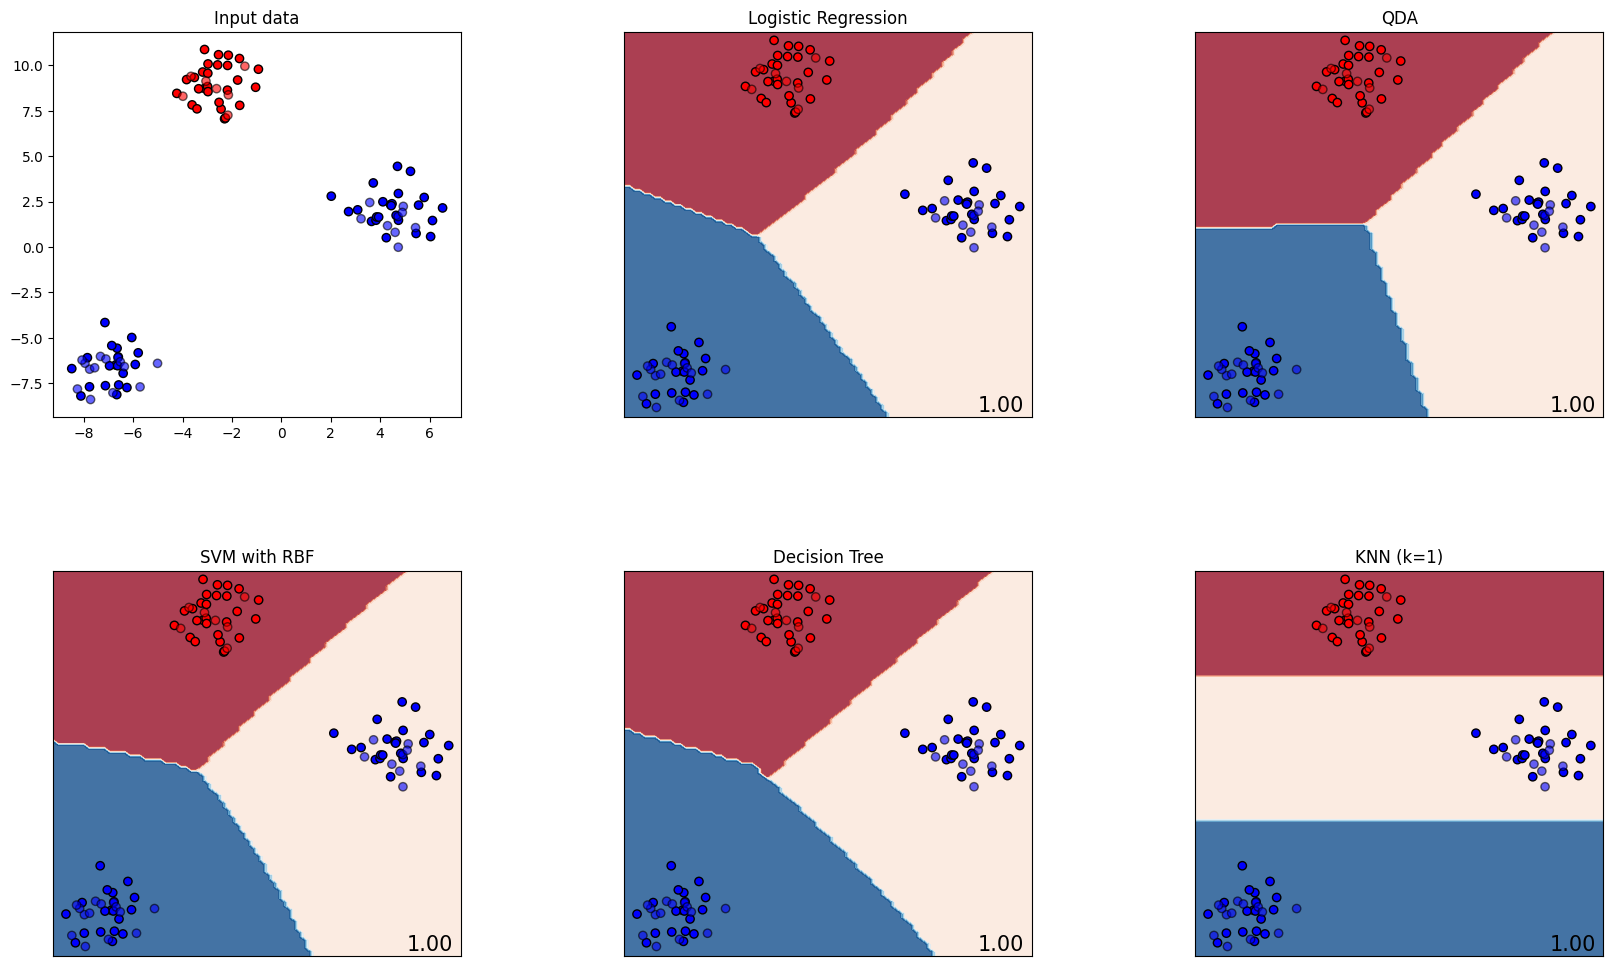

In [22]:
# Create a mesh to plot for make-blobs
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

# Set up the plot grid
fig, sub = plt.subplots(2, 3, figsize=(20,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = sub.flatten()[0]
ax.set_title("Input data")

# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

for clf, title, ax in zip(classifiers, classifier_names[1:], sub.flatten()[1:]):
    # Fit the classifier
    clf.fit(X_train, y_train)

    # Predict and plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

    # Plot training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    # Add titles and formatting
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    score = clf.score(X_test, y_test)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

# Display the combined plot
plt.show()

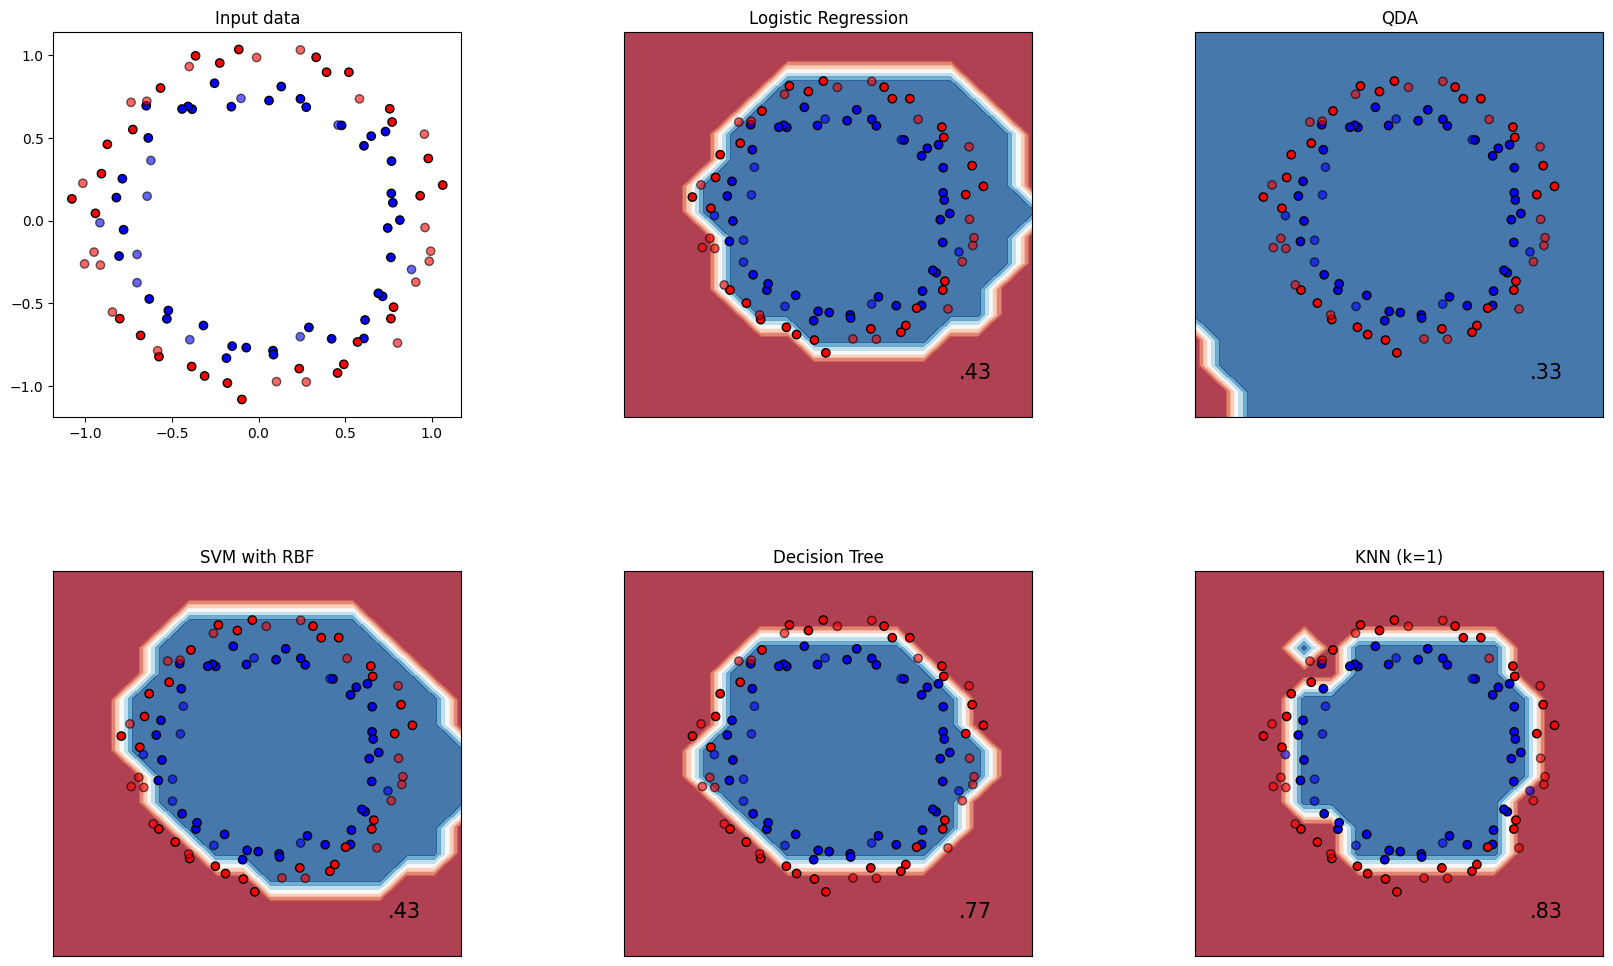

In [21]:
# Create a mesh to plot for make-circles
x2_min, x2_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y2_min, y2_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
xx2, yy2 = np.meshgrid(np.arange(x2_min, x2_max, 0.2),
                     np.arange(y2_min, y2_max, 0.2))

# Set up the plot grid
fig, sub = plt.subplots(2, 3, figsize=(20,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = sub.flatten()[0]
ax.set_title("Input data")
# Plot the training points
ax.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X2_test[:, 0], X2_test[:, 1], c=y2_test, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

for clf, title, ax in zip(classifiers, classifier_names[1:], sub.flatten()[1:]):
    # Fit the classifier
    clf.fit(X2_train, y2_train)

    # Predict and plot the decision boundary
    Z2 = clf.predict(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    ax.contourf(xx2, yy2, Z2, cmap=cm, alpha=0.8)

    # Plot training points
    ax.scatter(X2_train[:, 0], X2_train[:, 1], c=y2_train, cmap=cm_bright,
               edgecolors='k')
    # Plot testing points
    ax.scatter(X2_test[:, 0], X2_test[:, 1], c=y2_test, cmap=cm_bright,
               edgecolors='k', alpha=0.6)

    # Add titles and formatting
    ax.set_xlim(xx2.min(), xx2.max())
    ax.set_ylim(yy2.min(), yy2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    score = clf.score(X2_test, y2_test)
    ax.text(xx2.max() - .3, yy2.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

# Display the combined plot
plt.show()

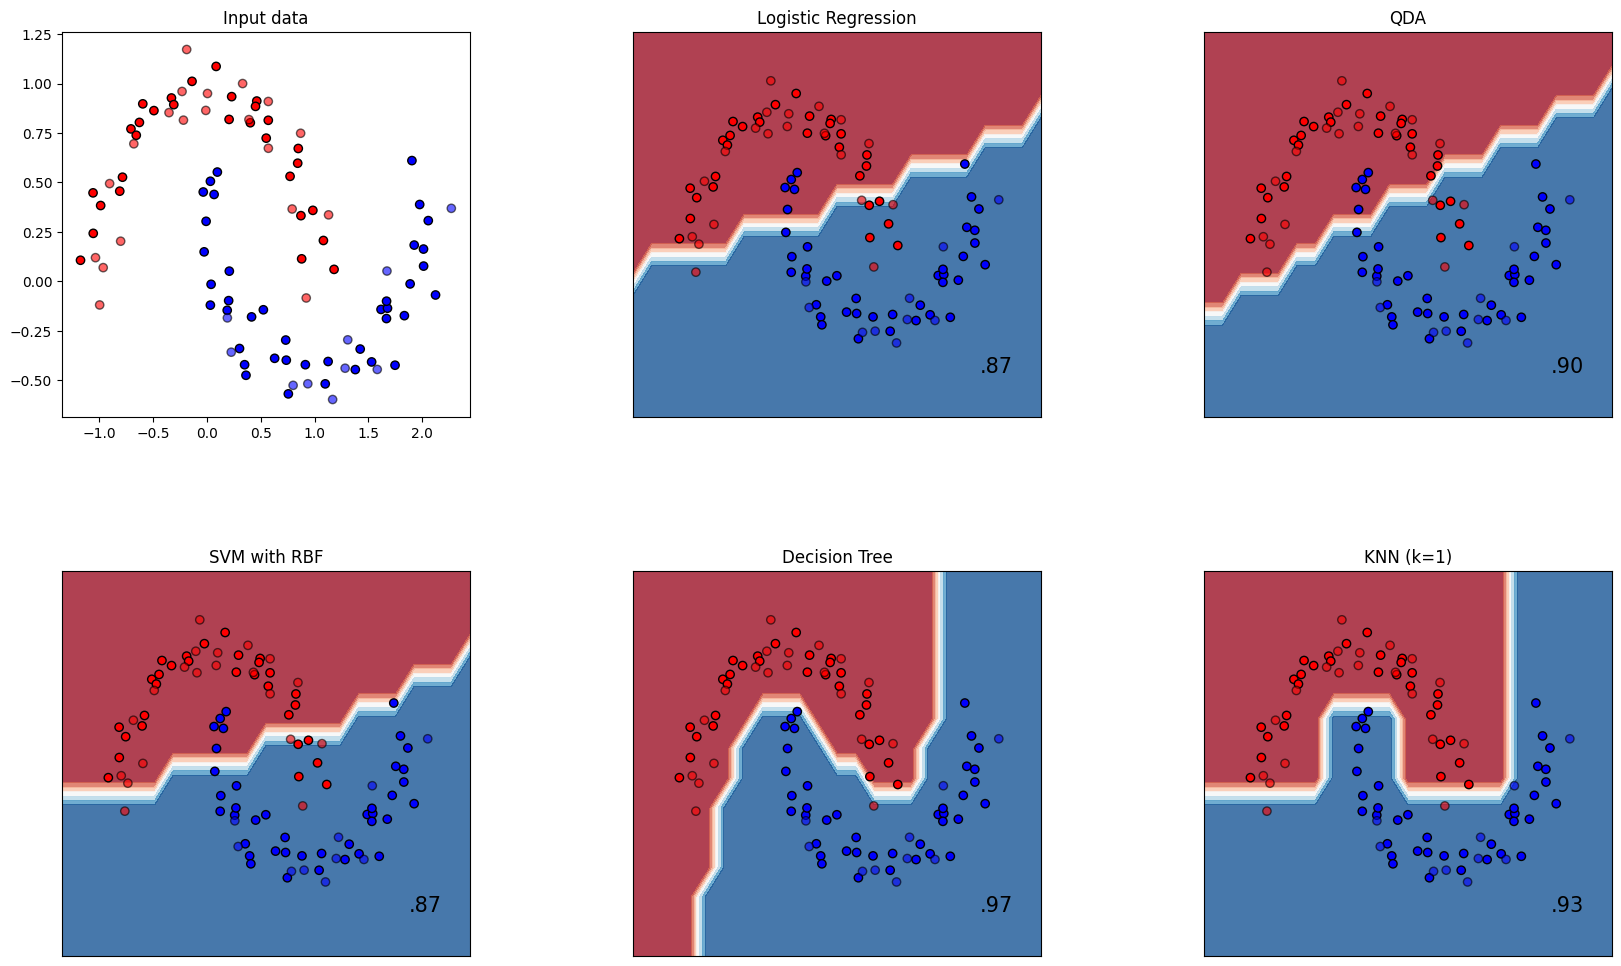

In [23]:

# Create a mesh to plot fpr make-moons
x3_min, x3_max = X3[:, 0].min() - .5, X3[:, 0].max() + .5
y3_min, y3_max = X3[:, 1].min() - .5, X3[:, 1].max() + .5
xx3, yy3 = np.meshgrid(np.arange(x3_min, x3_max, 0.2),
                       np.arange(y3_min, y3_max, 0.2))

# Set up the plot grid
fig, sub = plt.subplots(2, 3, figsize=(20,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = sub.flatten()[0]
ax.set_title("Input data")
# Plot the training points
ax.scatter(X3_train[:, 0], X3_train[:, 1], c=y3_train, cmap=cm_bright, edgecolors='k')
# Plot the testing points
ax.scatter(X3_test[:, 0], X3_test[:, 1], c=y3_test, cmap=cm_bright, alpha=0.6, edgecolors='k')

for clf, title, ax in zip(classifiers, classifier_names[1:], sub.flatten()[1:]):
    # Fit the classifier
    clf.fit(X3_train, y3_train)

    # Predict and plot decision boundary
    Z3 = clf.predict(np.c_[xx3.ravel(), yy3.ravel()])
    Z3 = Z3.reshape(xx3.shape)
    ax.contourf(xx3, yy3, Z3, cmap=cm, alpha=0.8)

    # Plot training points
    ax.scatter(X3_train[:, 0], X3_train[:, 1], c=y3_train, cmap=cm_bright, edgecolors='k')
    # Plot testing points
    ax.scatter(X3_test[:, 0], X3_test[:, 1], c=y3_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    # Add titles and adjust formatting
    ax.set_xlim(xx3.min(), xx3.max())
    ax.set_ylim(yy3.min(), yy3.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    score = clf.score(X3_test, y3_test)
    ax.text(xx3.max() - .3, yy3.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')

# Display the combined plot
plt.show()
